IMPORTING ALL NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

DATA PREPROCESSING(EXPLORATION)

In [2]:
#import dataset
candy_rating = pd.read_csv("C:/Users/FOLU/Downloads/candy-data.csv")

In [3]:
#print data head
candy_rating.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [4]:
#print info of data set
candy_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [5]:
#print shape of data set
candy_rating.shape

(85, 13)

In [6]:
#print columns of data set
candy_rating.columns

Index(['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy',
       'nougat', 'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [7]:
#print the descriptive statistics
candy_rating.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [8]:
#print total null values
candy_rating.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

the dataset above has no null values

In [9]:
#drop competitor name column
cdrating_drop=candy_rating.drop(columns='competitorname', inplace=True)

In [10]:
#print current data head after dropping the column "competitor name"
candy_rating.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


PREDICTION TO KNOW WHETHER A CANDY IS CHOCOLATE OR NOT

In [12]:
#print all variables from index location 1 to the end
x_var=candy_rating.iloc[:, 1:]
x_var

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...
80,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [20]:
#print columns of the independent variables
x_var.columns

Index(['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent',
       'winpercent'],
      dtype='object')

In [14]:
#print the target variable on index zero
y_var=candy_rating.iloc[:,0]
y_var

0     1
1     1
2     0
3     0
4     0
     ..
80    0
81    0
82    0
83    0
84    1
Name: chocolate, Length: 85, dtype: int64

In [15]:
#initialise your correlation matrix
corr_matrix = x_var.corrwith(y_var)
display(corr_matrix)

fruity             -0.741721
caramel             0.249875
peanutyalmondy      0.377824
nougat              0.254892
crispedricewafer    0.341210
hard               -0.344177
bar                 0.597421
pluribus           -0.339675
sugarpercent        0.104169
pricepercent        0.504675
winpercent          0.636517
dtype: float64

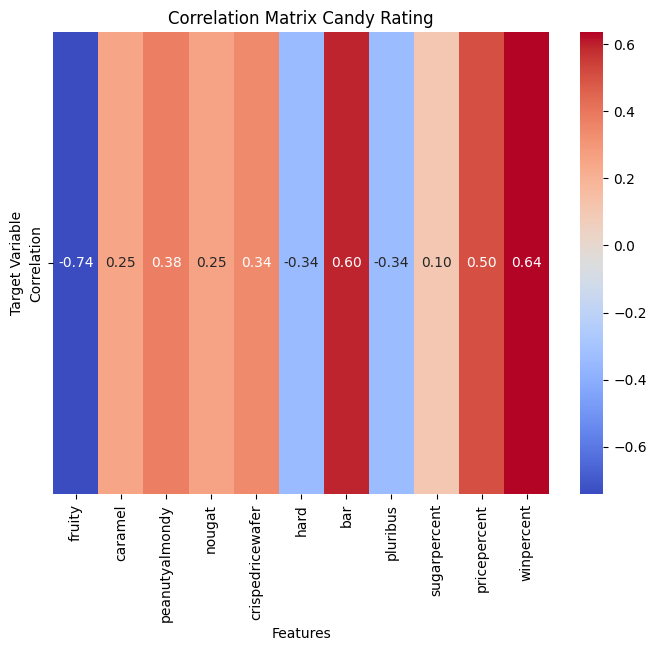

In [16]:
#plot the correlation for the variables
correlation_cd = pd.DataFrame(corr_matrix, columns=['Correlation'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_cd.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Candy Rating')
plt.xlabel('Features')
plt.ylabel('Target Variable')
plt.show()

TRAINING THE MODEL WITH LOGISTIC REGRESSION ALGORITHM

In [18]:
#import train-test-split
from sklearn.model_selection import train_test_split

In [17]:
#import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [39]:
#import all validating metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [24]:
#define X and y
y = candy_rating["chocolate"]
X =  candy_rating [['fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer','hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent','winpercent']]

In [25]:
#define the train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [27]:
#initialise the logistic regression
lr_model = LogisticRegression()

In [28]:
# fit model on the entire training set
lr_model.fit(X_train,y_train)

LogisticRegression()

In [29]:
# Predict model on the test set
y_predict = lr_model.predict(X_test)

In [30]:
y_predict

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

VALIDATE MODELS USING ACCURACY SCORE, F1 SCORE, PRECISION SCORE, RECALL SCORE AND CONFUSION MATRIX

In [32]:
# Print accuracy score
accuracy_cr = accuracy_score(y_predict, y_test)
accuracy_cr

0.8823529411764706

In [34]:
#Print f1 score
f1_cr = f1_score(y_predict, y_test)
f1_cr

np.float64(0.8333333333333334)

In [35]:
#print precision score
prec_cr = precision_score(y_predict, y_test)

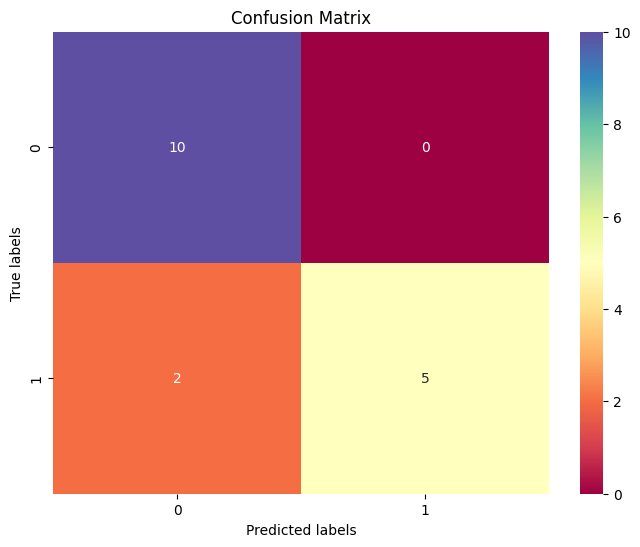

In [41]:
# generate Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Spectral', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

CLASSIFICATION REPORT

In [36]:
#import classification report
from sklearn.metrics import classification_report

In [37]:
# print Logistic Regression clasification report
print("classification report:\n", classification_report(y_test, y_predict))

classification report:
               precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.71      0.83         7

    accuracy                           0.88        17
   macro avg       0.92      0.86      0.87        17
weighted avg       0.90      0.88      0.88        17

